<a href="https://colab.research.google.com/github/qwert0242/BI-Exercise/blob/master/2023%E7%B5%B1%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import scipy.stats as stats

# 假設您的資料檔案為 CSV 格式
housing_data = pd.read_csv('房屋買賣移轉登記.csv')
income_data = pd.read_csv('家庭年所得.csv')

# 設定地區/年份為索引，以方便進行合併或計算
housing_data = housing_data.set_index('Area').transpose()
income_data = income_data.set_index('Area').transpose()

# 計算成長率的函數
def calculate_growth_rate(data):
    return data.pct_change() * 100  # 以百分比形式表示

# 計算房屋移轉次數的成長率
housing_growth_rate = calculate_growth_rate(housing_data)

# 計算家庭年所得的成長率
income_growth_rate = calculate_growth_rate(income_data)


# 合併兩個成長率的資料框
merged_growth_rate = pd.concat([housing_growth_rate, income_growth_rate], axis=1, keys=['Housing', 'Income'])

# 排除包含NaN的行
merged_growth_rate = merged_growth_rate.dropna()

# 分開成兩個表格
housing_table = merged_growth_rate['Housing'].style.set_caption('Housing Growth Rate').format("{:.2f}%")
income_table = merged_growth_rate['Income'].style.set_caption('Income Growth Rate').format("{:.2f}%")

# 顯示兩個表格
display(housing_table)
display(income_table)

Area,Taipei,New Taipei,Taoyuan,Taichung,Tainan,Kaohsiung
2019,3.40%,5.97%,16.78%,9.13%,10.31%,11.95%
2020,12.39%,5.52%,13.19%,11.94%,-0.60%,2.74%
2021,-0.89%,7.81%,2.45%,2.81%,16.09%,17.32%
2022,-7.41%,-11.88%,-6.18%,1.41%,-13.68%,-17.33%


Area,Taipei,New Taipei,Taoyuan,Taichung,Tainan,Kaohsiung
2019,4.47%,2.10%,0.98%,1.46%,-0.64%,0.44%
2020,-0.37%,2.48%,2.29%,-0.68%,0.68%,-0.05%
2021,0.90%,2.15%,1.75%,1.15%,3.14%,0.61%
2022,1.17%,2.88%,0.04%,2.63%,2.06%,2.56%


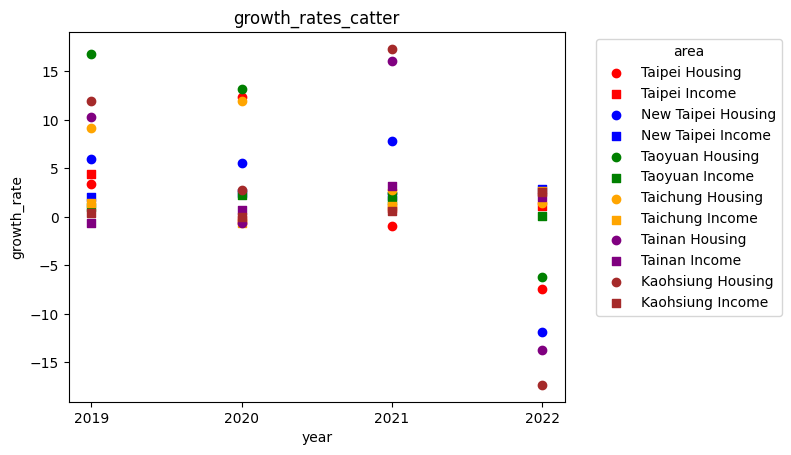

In [33]:
# 設置顏色
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# 繪製散點圖
for i, area in enumerate(merged_growth_rate.columns.get_level_values(1).unique()):
    plt.scatter(merged_growth_rate.index, merged_growth_rate['Housing', area], label=f'{area} Housing', color=colors[i])
    plt.scatter(merged_growth_rate.index, merged_growth_rate['Income', area], label=f'{area} Income', marker='s', color=colors[i])

plt.title('growth_rates_catter')
plt.xlabel('year')
plt.ylabel('growth_rate')
plt.legend(title='area', bbox_to_anchor=(1.05, 1), loc='upper left')  # 調整圖例位置
plt.show()

In [48]:
# 計算相關性係數
correlation = housing_growth_rate.corrwith(income_growth_rate)

# 顯示相關性係數
print("相關性係數:")
print(correlation)

相關性係數:
Area
Taipei       -0.204014
New Taipei   -0.906212
Taoyuan       0.569396
Taichung     -0.806917
Tainan       -0.008659
Kaohsiung    -0.795767
dtype: float64


In [34]:
'''
台北地區 (Taipei)：
觀察： 家庭所得增加與房屋買賣移轉成長率下降呈負相關。
可能原因： 可能是由於房價高昂，導致高所得家庭選擇保持現有房產，而不是進行房地產交易。

新北市地區 (New Taipei)：
觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。
可能原因： 可能受到政府政策、土地供應、或其他地方經濟因素的影響，使得高收入家庭不願進行大量的房地產交易。

桃園地區 (Taoyuan)：
觀察： 家庭所得增加與房屋買賣移轉成長率增加呈正相關。
可能原因： 可能由於桃園地區的經濟活動蓬勃，且土地供應相對充足，吸引了更多高收入家庭進行房地產交易。

台中地區 (Taichung)：
觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。
可能原因： 可能受到土地供應、房價調整、或其他經濟因素的影響，使得高收入家庭不願進行房地產交易。

台南地區 (Tainan)：
觀察： 家庭所得成長率與房屋買賣移轉成長率相關性較弱。
可能原因： 可能是由於台南地區的市場特性，使得家庭所得變動對房地產市場的影響相對較小。

高雄地區 (Kaohsiung)：
觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。
可能原因： 可能受到地區經濟結構、土地供應、或其他市場因素的影響，使得高收入家庭對房地產市場的參與下降。
'''

'\n台北地區 (Taipei)：\n觀察： 家庭所得增加與房屋買賣移轉成長率下降呈負相關。\n可能原因： 可能是由於房價高昂，導致高所得家庭選擇保持現有房產，而不是進行房地產交易。\n\n新北市地區 (New Taipei)：\n觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。\n可能原因： 可能受到政府政策、土地供應、或其他地方經濟因素的影響，使得高收入家庭不願進行大量的房地產交易。\n\n桃園地區 (Taoyuan)：\n觀察： 家庭所得增加與房屋買賣移轉成長率增加呈正相關。\n可能原因： 可能由於桃園地區的經濟活動蓬勃，且土地供應相對充足，吸引了更多高收入家庭進行房地產交易。\n\n台中地區 (Taichung)：\n觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。\n可能原因： 可能受到土地供應、房價調整、或其他經濟因素的影響，使得高收入家庭不願進行房地產交易。\n\n台南地區 (Tainan)：\n觀察： 家庭所得成長率與房屋買賣移轉成長率相關性較弱。\n可能原因： 可能是由於台南地區的市場特性，使得家庭所得變動對房地產市場的影響相對較小。\n\n高雄地區 (Kaohsiung)：\n觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。\n可能原因： 可能受到地區經濟結構、土地供應、或其他市場因素的影響，使得高收入家庭對房地產市場的參與下降。\n'

In [35]:
# 計算平均值
average_housing_growth_rate = housing_growth_rate.mean(axis=1)
average_income_growth_rate = income_growth_rate.mean(axis=1)

# 轉換為 DataFrame
average_df = pd.DataFrame({
    'Average_Housing_growth_rate': average_housing_growth_rate,
    'Average_Income_growth_rate': average_income_growth_rate
})

# 排除包含NaN的行
average_df = average_df.dropna()

# 將 DataFrame 轉置顯示
display(average_df.transpose())

,2019,2020,2021,2022
Average_Housing_growth_rate,9.588536,7.529448,7.597433,-9.179058
Average_Income_growth_rate,1.467304,0.723961,1.616212,1.891125


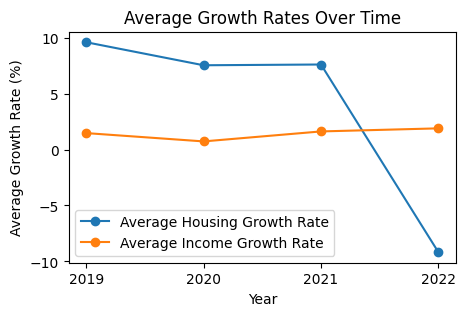

In [36]:
# 繪製折線圖
plt.figure(figsize=(5, 3))

# 繪製平均房屋成長率折線圖
plt.plot(average_df.index, average_df['Average_Housing_growth_rate'], label='Average Housing Growth Rate', marker='o')

# 繪製平均家庭年所得成長率折線圖
plt.plot(average_df.index, average_df['Average_Income_growth_rate'], label='Average Income Growth Rate', marker='o')

plt.title('Average Growth Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Average Growth Rate (%)')
plt.legend()
plt.show()

In [38]:
'''
在 2021 年和 2022 年期間，台灣房市受到了多重因素的影響，導致房屋買賣移轉棟數下降。這些因素包括：
央行連續升息，抑制房貸需求。
政府出台多項打炒房政策，打擊投機炒作。
新冠疫情反覆，影響經濟發展和民眾購房意願。

'''

'\n在 2021 年和 2022 年期間，台灣房市受到了多重因素的影響，導致房屋買賣移轉棟數下降。這些因素包括：\n央行連續升息，抑制房貸需求。\n政府出台多項打炒房政策，打擊投機炒作。\n新冠疫情反覆，影響經濟發展和民眾購房意願。\n\n'

In [37]:
# 顯示統計資料
display(average_df.describe())

,Average_Housing_growth_rate,Average_Income_growth_rate
count,4.000000,4.000000
mean,3.884090,1.424651
std,8.760976,0.499025
min,-9.179058,0.723961
25%,3.352322,1.281468
50%,7.563441,1.541758
75%,8.095209,1.684940
max,9.588536,1.891125


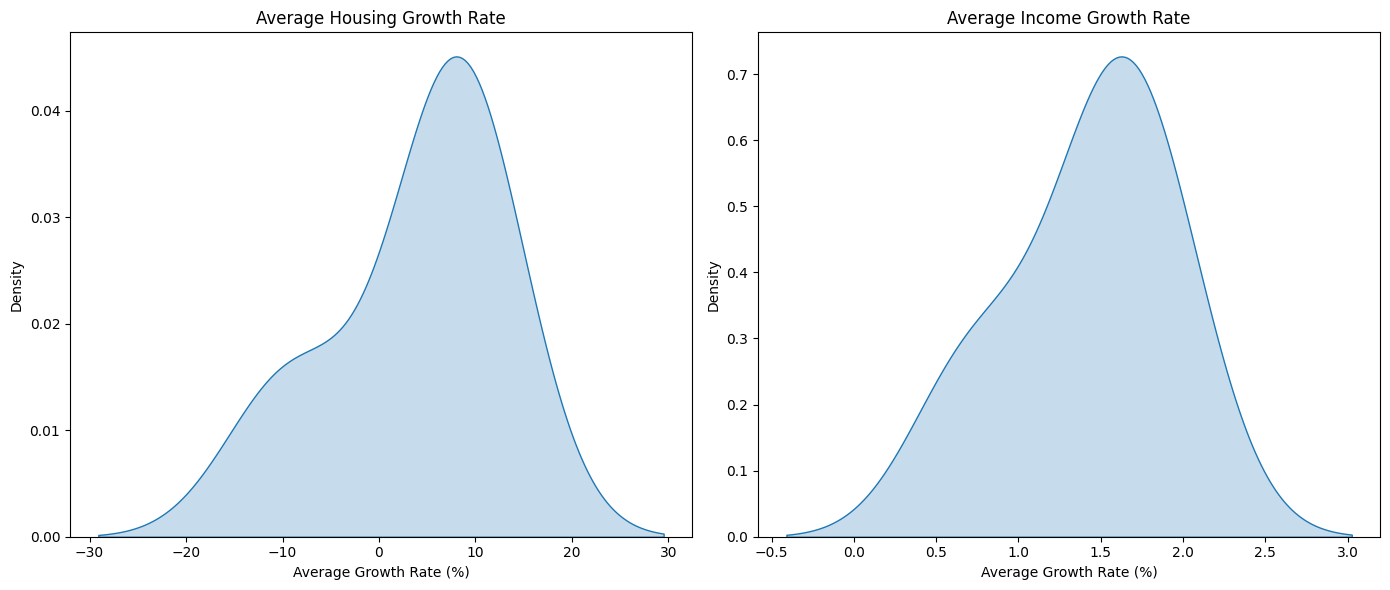

In [39]:
# 創建一個包含兩個子圖的Matplotlib圖表
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 第一個子圖：平均房屋成長率的核密度估計圖
sns.kdeplot(ax=axes[0], data=average_df['Average_Housing_growth_rate'], fill=True)
axes[0].set_title('Average Housing Growth Rate')
axes[0].set_xlabel('Average Growth Rate (%)')
axes[0].set_ylabel('Density')

# 第二個子圖：平均家庭年所得成長率的核密度估計圖
sns.kdeplot(ax=axes[1], data=average_df['Average_Income_growth_rate'], fill=True)
axes[1].set_title('Average Income Growth Rate')
axes[1].set_xlabel('Average Growth Rate (%)')
axes[1].set_ylabel('Density')

# 顯示圖表
plt.tight_layout()
plt.show()

In [ ]:
'''
這個子圖顯示了平均家庭年收入增長率的密度分布。從圖中可以看出，平均家庭年收入增長率的密度分布也呈鐘形分布。
然而，與平均房屋增長率的密度分布相比，平均家庭年收入增長率的密度分布更加集中。這意味著，家庭年收入增長率的變化幅度較小。

總結:
這兩個子圖可以用來比較平均房屋增長率和平均家庭年收入增長率的差異。從圖中可以看出，平均房屋增長率的變化幅度更大，這意味著房屋價格的波動性更大。

'''

In [40]:
print(average_df['Average_Housing_growth_rate'])

2019    9.588536
2020    7.529448
2021    7.597433
2022   -9.179058
Name: Average_Housing_growth_rate, dtype: float64


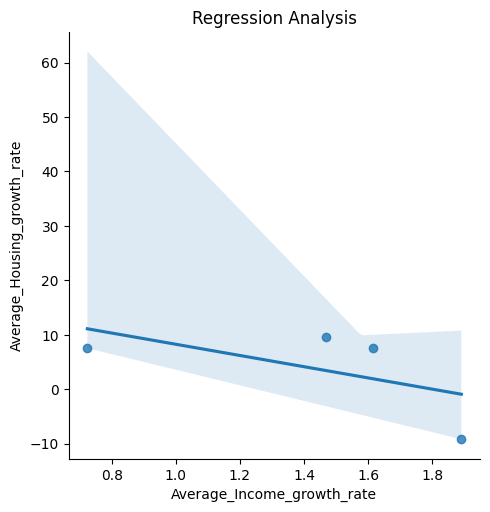

In [44]:
# 使用 seaborn 畫散點圖和回歸線
sns.lmplot(x='Average_Income_growth_rate', y='Average_Housing_growth_rate', data=average_df)

# 顯示圖表
plt.title('Regression Analysis')
plt.show()

In [ ]:
'''
根據圖表，可以得出以下結論：
在 2019 年至 2022 年期間，台灣平均收入增長率和平均房屋增長率呈正相關。這意味著，收入增長會導致房價上漲。
在 2019 年至 2022 年期間，台灣房價上漲速度快於收入上漲速度。這意味著，房價收入比上升。
在 2021 年和 2022 年期間，台灣政府出台了多項打炒房政策，抑制了房價上漲。這反映在圖表中，2021 年和 2022 年期間，平均房屋增長率有所回落
'''

In [45]:
from scipy import stats

# 準備兩組資料
housing_growth_rates = average_df['Average_Housing_growth_rate']
income_growth_rates = average_df['Average_Income_growth_rate']

# 進行雙尾獨立樣本 t 檢定
t_statistic, p_value = stats.ttest_ind(housing_growth_rates, income_growth_rates)

# 顯示結果
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# 判斷是否拒絕虛無假設
alpha = 0.05
if p_value < alpha:
    print("拒絕虛無假設，表示兩組平均成長率存在顯著差異。")
else:
    print("未能拒絕虛無假設，表示兩組平均成長率沒有顯著差異。")

T-statistic: 0.5605446586730544
P-value: 0.5954033523536806
未能拒絕虛無假設，表示兩組平均成長率沒有顯著差異。


In [47]:
'''
在這個統計檢定中，我們比較了平均房屋成長率和平均家庭年所得成長率的兩組資料。檢定統計量為0.5605，p-值為0.5954。這表示在統計學上，我們未能拒絕虛無假設，認為這兩組成長率之間的差異不是顯著的。

'''

'\n在這個統計檢定中，我們比較了平均房屋成長率和平均家庭年所得成長率的兩組資料。檢定統計量為0.5605，p-值為0.5954。這表示在統計學上，我們未能拒絕虛無假設，認為這兩組成長率之間的差異不是顯著的。\n'